In [117]:
import importlib
import numpy as np
from proj1_helpers import *
from least_squares import *
from ridge_regression import *
from gradient_descent import *
from logistic_regression import *
import matplotlib.pyplot as plt

In [91]:
y, txorg, ids = load_csv_data('Data/train.csv')
y = np.array([y])
y = y.T
txTest, idsTest = load_csv_Test('Data/test.csv')

SyntaxError: invalid syntax (Temp/ipykernel_17448/1449487526.py, line 3)

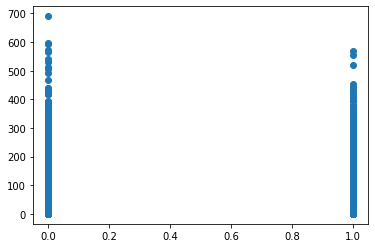

In [121]:
plt.scatter(y[:],txorg[:,1] )

In [124]:

#polFunc = np.ones([tx.shape[0],tx.shape[1]*(degree+1)])
# for j in range(degree):
#     polFunc[i,j] = np.power(tx,)


degree = 2
polFunc = np.ones([txorg.shape[0],txorg.shape[1]*(degree)+1])
for j in range(degree):
    #trying with mean now
    polFunc[:,1+30*j:1+30*j+30] = np.power(txorg,j+1)
tx = polFunc
mse, testW1  = least_squares(y,polFunc)
print(mse)

0.0794653488135822


In [ ]:
import testlog as ts
importlib.reload(ts)
l = np.zeros((30,1))
print(y.shape)
print(tx.shape)
print(l.shape)
testW, loss = ts.logistic_regression_test(y, tx, l, 5000, 0.000001)
e = y- tx @ testW
mse =  1/(2*len(y))*e.T@e
print(mse)




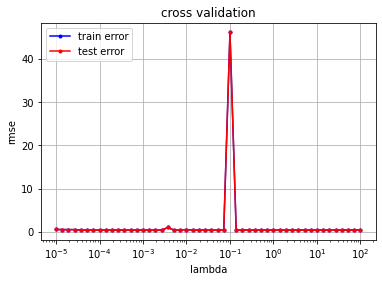

In [111]:
w_init = least_squares(y,tx)[1]
#gradient descent -15 to -6.5 gives good overview
#logistic gradeint diverges after around -14 graph until 13.8 gives good overview -14 good with rmse
lambdas = np.logspace(-5, 2, 50)
rmse_te = []
rmse_tr = []
for lambda_ in lambdas:
    k_indices = build_k_indices(y,4,1)
    tr = []
    te = []
    for k in range(len(k_indices)):

        

        #make a mask to extract all test data
        mask = np.zeros(tx.shape[0], dtype=bool)
        mask[k_indices[k]] = True

        train_x = tx[mask,...]
        train_y = y[mask]
        amask = np.invert(mask)
        test_x = tx[amask,...]
        test_y = y[amask]
        mse, weights = ridge_regression(y,tx,lambda_)

        # calculate the loss for train and test data:
        """rmse loss"""
        loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
        loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))
       
        """logistic loss"""
        
        # loss_tr = compute_loss(train_y, train_x, weights)
        # loss_te = compute_loss(test_y, test_x, weights)
        
        tr.append(loss_tr)
        te.append(loss_te)
    rmse_tr.append(np.array(tr).mean())
    rmse_te.append(np.array(te).mean())

cross_validation_visualization(lambdas, rmse_tr, rmse_te)



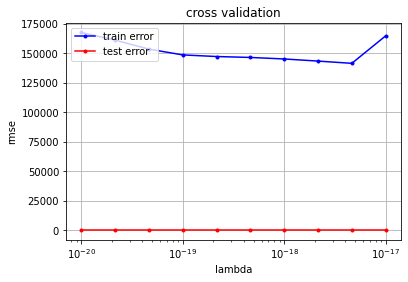

In [127]:
w_init = least_squares(y,tx)[1]
#gradient descent -15 to -6.5 gives good overview
#logistic gradeint diverges after around -14 graph until 13.8 gives good overview -14 good with rmse
lambdas = np.logspace(-20, -17, 10)
rmse_te = []
rmse_tr = []
for lambda_ in lambdas:
    k_indices = build_k_indices(y,1,1)
    tr = []
    te = []
    for k in range(len(k_indices)):

        

        #make a mask to extract all test data
        mask = np.zeros(tx.shape[0], dtype=bool)
        mask[k_indices[k]] = True

        train_x = tx[mask,...]
        train_y = y[mask]
        amask = np.invert(mask)
        test_x = tx[amask,...]
        test_y = y[amask]
        mse, weights = logistic_regression(y,tx, w_init,50,lambda_)

        # calculate the loss for train and test data:
        """rmse loss"""
        # loss_tr = np.sqrt(2 * compute_mse(train_y, train_x , weights))
        # loss_te = np.sqrt(2 * compute_mse(test_y, test_x , weights))
       
        """logistic loss"""
        
        loss_tr = calculate_loss(train_y, train_x, weights)
        loss_te = calculate_loss(test_y, test_x, weights)
        
        tr.append(loss_tr)
        te.append(loss_te)
    rmse_tr.append(np.array(tr).mean())
    rmse_te.append(np.array(te).mean())

cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:

mse, testW  = least_squares(y,tx)

print(testW.shape)


In [ ]:
mse, testW = ridge_regression(y,tx,0.005)
print(mse)

l = testW


In [ ]:


l = np.zeros((30,1))

test = tx.T @ y


mse, testW = gradient_descent(y, tx, l, 500, 0.0000001)
print(mse)

In [ ]:
l = np.zeros((30,1))
print(y.shape)
print(tx.shape)
print(l.shape)
mse, testW = logistic_regression(y, tx, l, 500, pow(10,-30))
print(mse)

In [ ]:

l = np.ones((30,1))*0.5
print(y.shape)
print(tx.shape)
print(l.shape)
mse, testW = penalized_logistic_regression(y, meanTX, 0.1, l, 50, 0.000000000001)
print(mse)

In [21]:
w_init = np.zeros((30,1))

testW = logistic_regression(y,tx,w_init,500, pow(10,-11.5))[1]


In [31]:

yPred1 = predict_labels(testW, txTest)
yPred1[np.where(yPred1==0)] = -1

create_csv_submission(idsTest, yPred1, "testSub.csv")

In [54]:
mse, testW1  = least_squares(y,tx)

LinAlgError: Singular matrix

In [26]:
yPred = predict_labels(testW1, txTest)
yPred[np.where(yPred==0)] = -1
print(yPred)
create_csv_submission(idsTest, yPred, "testSub1.csv")

[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [ 1.]
 [-1.]]


In [30]:
check =yPred+yPred1
print(np.count_nonzero(check==0))
len(check)

117810


568238